# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import math 
df = pd.read_csv('data/human_body_temperature.csv')

In [5]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


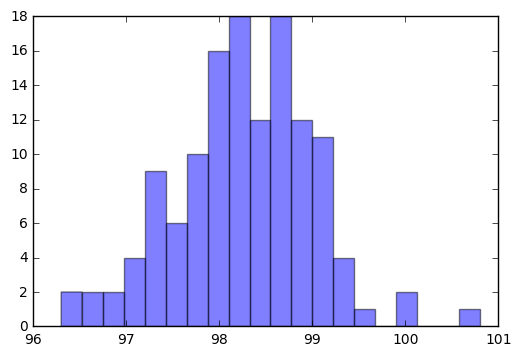

In [7]:
#Is the distribution of body temperatures normal? 
fig, ax = plt.subplots()
H= ax.hist(df.temperature, bins =20, alpha=0.5)
fig
#yes

In [ ]:
#Is the sample size large? Are the observations independent? 
#Sample Size is large, as there are over 100 samples
# The observations are independent, as the temperature of 
#one person does not influence the temperature of the next person

In [10]:
#Is the true population mean really 98.6 degrees F? 
# Here it is appropriate to use the one-sample z statistic
des = df.describe()

In [14]:
des

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [36]:
popsem = (des.temperature[2]/math.sqrt(des.temperature[0]))

In [37]:
popsem

0.06430441683789101

In [38]:
CI99 = popsem * 2.58 #2.58 is z statistic for 99% confidence

In [39]:
CI95 = popsem *1.65 #1.65 is z statistic for 95% confidence

In [40]:
CI99

0.16590539544175881

In [41]:
CI95

0.10610228778252016

In [ ]:
# Confident that 99% chance that population temperature is within
# 98.25F +_ 0.17F so between 98.08 and 98.42
#and 95% confidence that temp is between 98.144 and 98.36

In [25]:
# using t-statistic 95% confidence
# -1.657< t < 1.657





11.40175425099138

In [31]:
-1.657*popstdev 

-0.1065524187003854

In [ ]:
#-0.107 < 98.25 - mu < 0.107

#0.107 > mu - 98.25 > -0.107

In [32]:
98.25+0.107

98.357

In [33]:
98.25+(-0.107)

98.143

In [ ]:
#98.357 > mu >98.143

In [ ]:
# 95% chance that population temperature mean (mu)
# is 98.143 < mu < 98.357

In [ ]:
#At what temperature should we consider someone's temperature to be "abnormal"? 

In [61]:
#Temperature is to be considered abnormal if it is mu +/- 2 Stdev
#so anything outside the range of 96.784 to 99.716
2*0.733

1.466

In [62]:
98.25 - 1.466

96.784

In [63]:
98.25 + 1.466

99.716

In [42]:
#Is there a significant difference between males and females in normal temperature? 

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [46]:
Males = df[df.gender == 'M']
Males.head()

,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
12,98.2,M,72.0


In [55]:
Females = df[df.gender == 'F']


pandas.core.frame.DataFrame

In [56]:
scipy.stats.ttest_ind(Females['temperature'], Males['temperature'])

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

In [57]:
Males.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


In [58]:
Females.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


In [60]:
#The t-test pvalue of 0.02 suggests that there is a 2%
#chance that the observed difference in male and female temperature
#occured by chance. Typically, we reject the null hypothesis
#if there is less than a 5% chance that the observed results occured by chance
#therefore according to this data, there appears to be a significant
#difference in Male and Female temperature, with females being around
#0.29 degrees warmer. However, further investigations should 
#look at the power of the sample size. 